# Further exploring model results 
This notebook explores validation set results from the more recent version of my model. As the dataset is very large I am only loading in a subset of this validation set.

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
species_labels=pd.read_csv('species_labels.csv')
#species_labels

In [2]:
import fastai
from fastai.vision.all import *

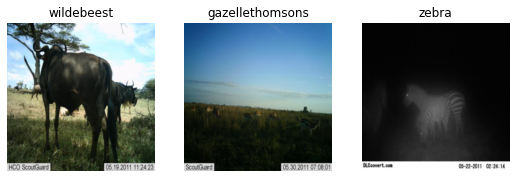

In [3]:
def get_x(r): return r['image_id']
def get_y(r): return r['species']
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   splitter=RandomSplitter(seed=42),
                   get_x=get_x, 
                   get_y=get_y,
                   item_tfms = Resize(256, ResizeMethod.Squish))

dls = dblock.dataloaders(species_labels,bs=16)
dls.show_batch(nrows=1,ncols=3)

In [4]:
fscore = FBeta(average='macro', beta=1)
learn = cnn_learner(dls, resnet50, metrics=[accuracy, fscore, error_rate])

In [5]:
learn.load('fine_tuned_model')

In [6]:
#Loading subset of validation set
dls.loaders.append(dls.test_dl(dls.valid_ds.items[:12000], with_labels=True))


In [7]:
interp = ClassificationInterpretation.from_learner(learn, ds_idx=2)

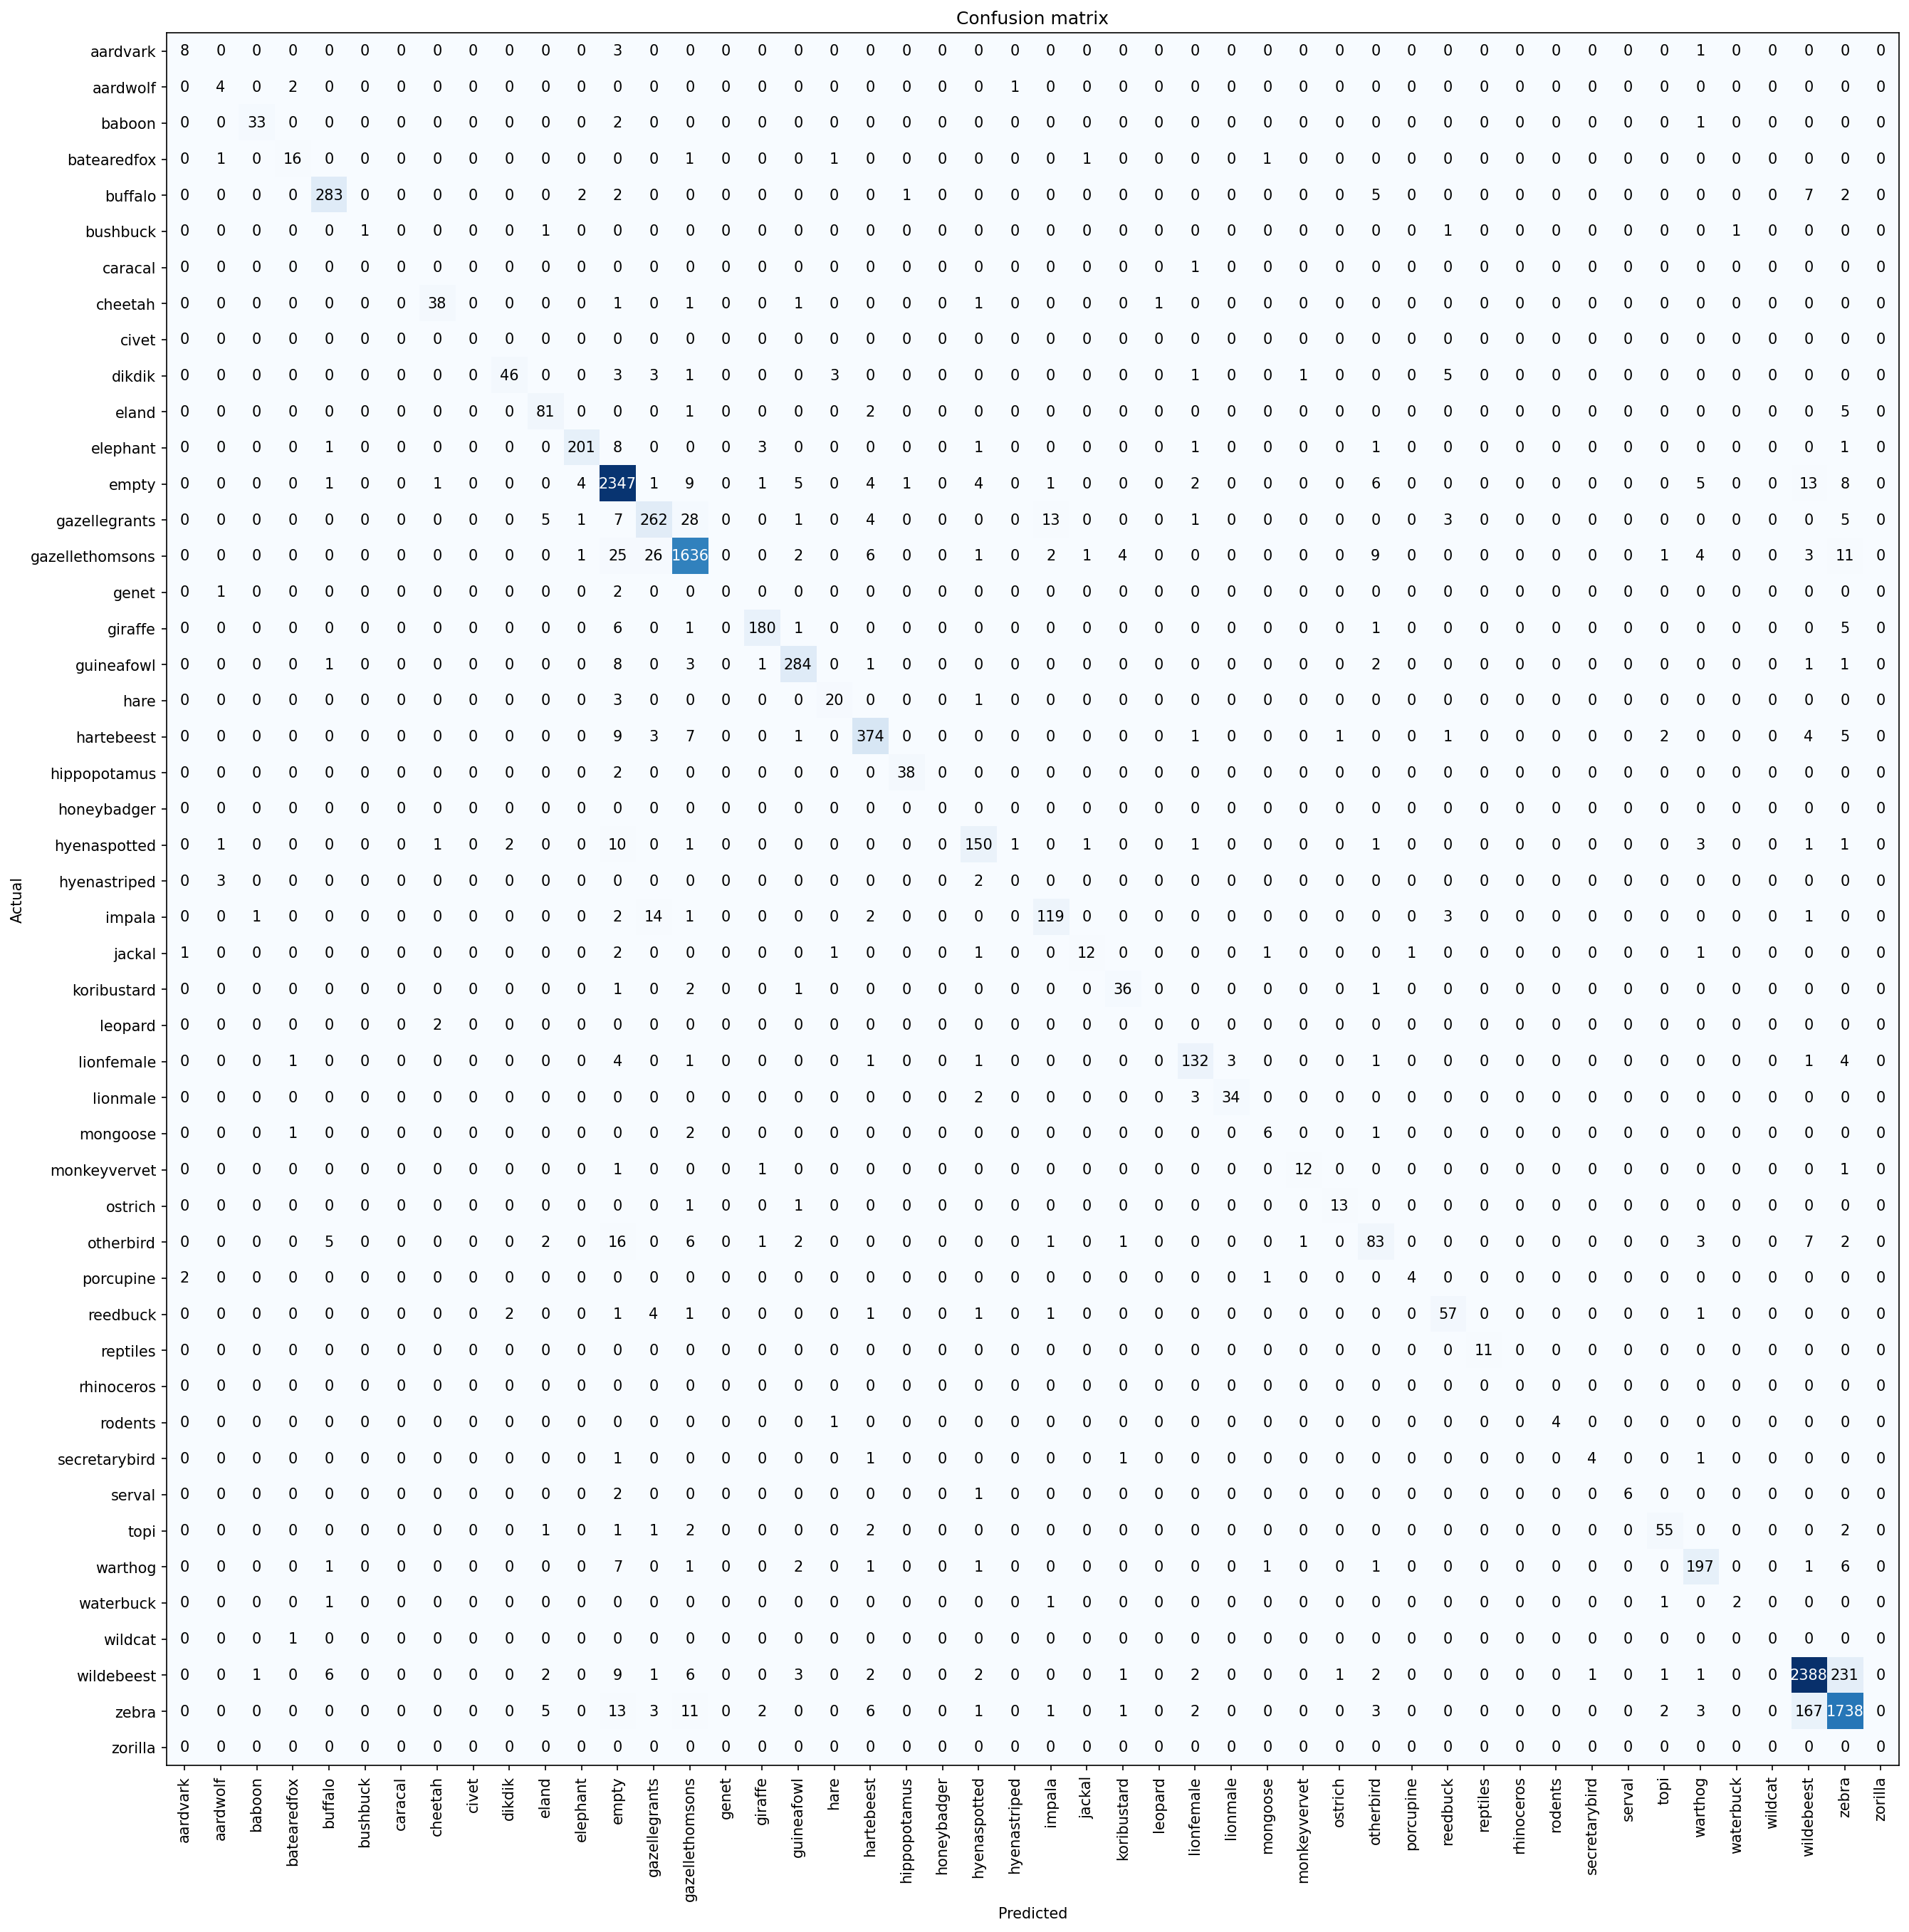

In [14]:
#This matrix is very large, due to the number of classes as well as the size of the subset I had to make the confusion matrix large enough that some of the larger values in the matrix weren't getting cut off
#Looking at the predicted empty column this gives further indication an area where the model is still failing in with empty images that were mis-classified by the dataset at non-empty classes
interp.plot_confusion_matrix(figsize=(18,18), dpi=150)
plt.savefig('giant_confusion_matrix.png')

# Takeaways

While using the first-frames only version of the dataset has improved overall model performance it is apparent here that it does not resolve the issue of images in the original dataset being mislabeled. Manual relabelling of high-loss images or concatination of image groups may be the most effective methods of alleviating this particular issue. The concatination option would require retraining the model but would likely be the least labor-intensive option considered thus far.  